In [12]:
import json
import os
import utils.plotting_tools as plot
from matplotlib import pyplot as plt

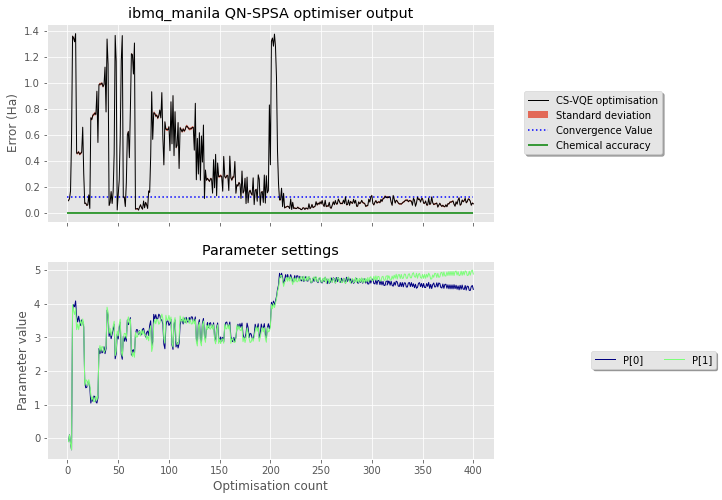

In [6]:
file = 'H3+_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)
fig.savefig('plots/'+file+'.png', dpi=300, bbox_inches='tight')

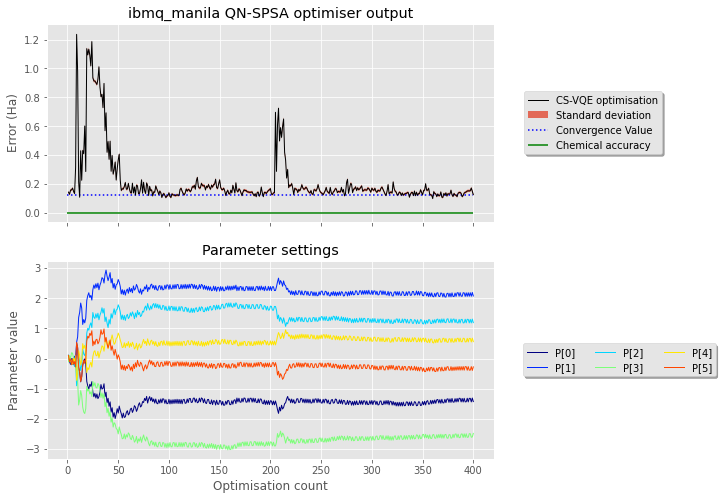

In [7]:
file = 'FH_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)
fig.savefig('plots/'+file+'.png', dpi=300, bbox_inches='tight')

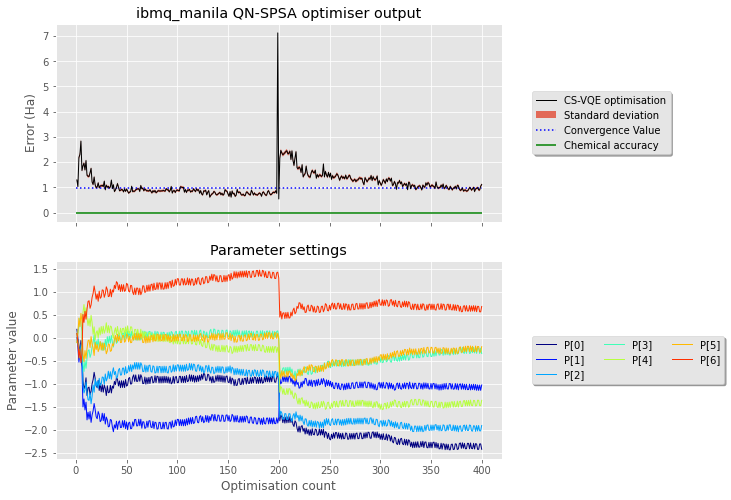

In [8]:
file = 'B+_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)
fig.savefig('plots/'+file+'.png', dpi=300, bbox_inches='tight')

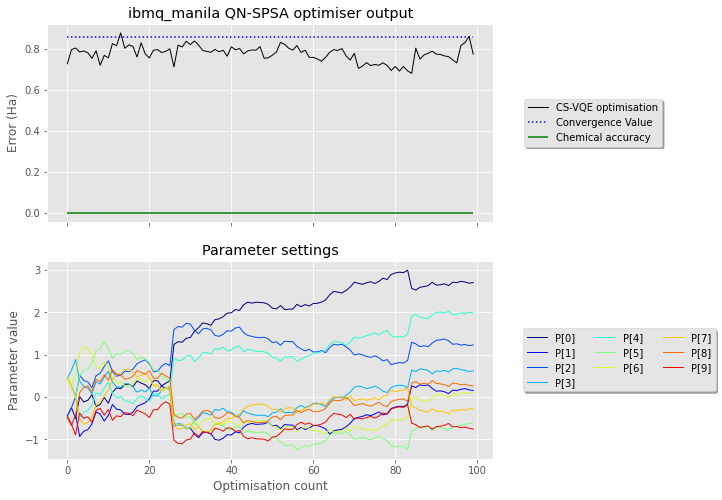

In [5]:
file = 'LiH_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)

In [15]:
import os
import itertools
import json
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

backends = ['statevector_simulator',
            'ibmq_qasm_simulator',
            'ibmq_santiago',
            'ibmq_bogota',
            'ibmq_lima',
            'ibmq_belem',
            'ibmq_quito',
            'ibmq_manila']

colour_map = {b:plt.cm.rainbow(index/len(backends)) for index, b in enumerate(backends)}

speciesnames = ['Be_STO-3G_SINGLET', 'B+_STO-3G_SINGLET', 'LiH_STO-3G_SINGLET', 'HF_STO-3G_SINGLET'] #'OH+_STO-3G_SINGLET'
meta_data = {'B+_STO-3G_SINGLET':{'num_sim_q':3,
                                  'true_gs':  -24.188150184262867,
                                 'gsvector':[ 1.44904811e-09-9.17700836e-10j, -8.42966938e-01+4.79549896e-01j,
        7.80583260e-02+1.53708220e-01j, -8.43486494e-16+8.95642220e-16j,
        1.18845044e-15-1.67776054e-15j, -1.42026364e-15+7.24871966e-17j,
       -7.80583260e-02-1.53708220e-01j,  2.96273301e-16+3.69716106e-16j]},
            'Be_STO-3G_SINGLET': {'num_sim_q':3,
                                  'true_gs':  -14.40365510806773,
                                 'gsvector':[ 6.71949664e-02+1.74417833e-01j, -7.18440010e-16+7.21847342e-16j,
       -6.71949664e-02-1.74417833e-01j, -6.21677296e-16+3.57117123e-17j,
       -2.12558276e-16-1.21482259e-16j, -6.41535829e-01-6.95429040e-01j,
       -1.37384103e-01+1.26737334e-01j,  1.87248195e-16+4.44868679e-16j]},
            'C_STO-3G_SINGLET':  {'num_sim_q':4,
                                  'true_gs':  -37.21873355063618,
                                 'gsvector':[ 2.28562065e-17-6.66743258e-16j,  1.39400913e-10+1.03369602e-10j,
        5.38902505e-17-2.23041788e-17j,  3.68498692e-16+2.58393607e-16j,
       -5.56230210e-17-8.18920866e-16j,  5.20719163e-04+1.44063285e-03j,
       -1.27805927e-04+5.23296815e-04j, -5.20719163e-04-1.44063285e-03j,
        1.04884414e-01+2.56161465e-02j,  3.56249796e-16-1.04858331e-15j,
       -1.04884414e-01-2.56161465e-02j, -3.55286053e-10-8.67713787e-11j,
       -9.96515421e-16-9.44429920e-16j,  6.57200424e-01-2.37546172e-01j,
       -1.49610804e-09+5.41216659e-10j, -6.57200424e-01+2.37546172e-01j]},
            'LiH_STO-3G_SINGLET':{'num_sim_q':4,
                                 'true_gs':   -7.877029837040657,
                                 'gsvector':[-3.33085352e-02+1.21353457e-02j,  3.06635726e-02-1.11717629e-02j,
        1.57223317e-02-2.85983749e-02j, -4.76298604e-01+8.66370749e-01j,
        5.41413572e-02-1.97254025e-02j, -1.75093136e-17+6.25015257e-16j,
        2.39111572e-03-4.34936172e-03j,  6.44745611e-16+1.00370438e-17j,
        2.77602806e-02-5.04949901e-02j,  2.39110987e-03-4.34935988e-03j,
        1.37764854e-09-2.50587641e-09j, -6.51582248e-10+1.18524993e-09j,
       -5.37857785e-02+9.78344733e-02j, -4.36264111e-16+5.09557011e-16j,
        3.23539806e-10-5.88544773e-10j, -7.66113316e-16+1.32398372e-16j]},
            #'OH+_STO-3G_SINGLET':{'num_sim_q':5,
            #                     'true_gs':0},
            'HF_STO-3G_SINGLET': {'num_sim_q':4,
                                  'true_gs':-98.60176689692878,
                                  'gsvector':[-1.06738393e-15+3.84216723e-15j, -1.49250396e-15+1.16283115e-15j,
       -2.46678661e-02+1.60849661e-02j, -1.12823714e-02+7.35680017e-03j,
        4.68315151e-16+1.32219314e-15j, -1.49881022e-15-6.14028231e-16j,
        2.84390634e-09-1.85440548e-09j, -1.13633831e-01+7.40962478e-02j,
       -2.18002001e-02+1.42150715e-02j,  2.93472194e-03-1.91361923e-03j,
       -2.93472478e-03+1.91362109e-03j,  8.28726108e-01-5.40380402e-01j,
       -2.51330228e-09+1.63883029e-09j,  2.46678664e-02-1.60849664e-02j,
       -3.38338387e-10+2.20616765e-10j,  1.12824538e-02-7.35685392e-03j]}
            }

file_order={'info':0, 'result':1}
cs_vqe_data={}

for speciesname in speciesnames:
    data_path = "data/IBMQ-runtime/"+speciesname
    cs_vqe_data[speciesname] = {}
    for job in os.listdir(data_path):
        if job not in ["old","statevectorsim.json"]:
            files = [(file_order[f[f.find('-')+1:f.find('.json')]], f) for f in os.listdir(data_path+'/'+job)]
            files = sorted(files, key=lambda x:x[0])
            for data_type, file in files:
                with open('{}/{}/{}'.format(data_path, job, file), 'r') as json_file:
                    vqe_results = json.load(json_file)
                if data_type == 0:
                    backend = vqe_results['backend']
                else:
                    cs_vqe_data[speciesname][backend] = vqe_results
        else:
            with open('{}/statevectorsim.json'.format(data_path), 'r') as json_file:
                vqe_results = json.load(json_file)
            cs_vqe_data[speciesname]['statevector_simulator'] = vqe_results

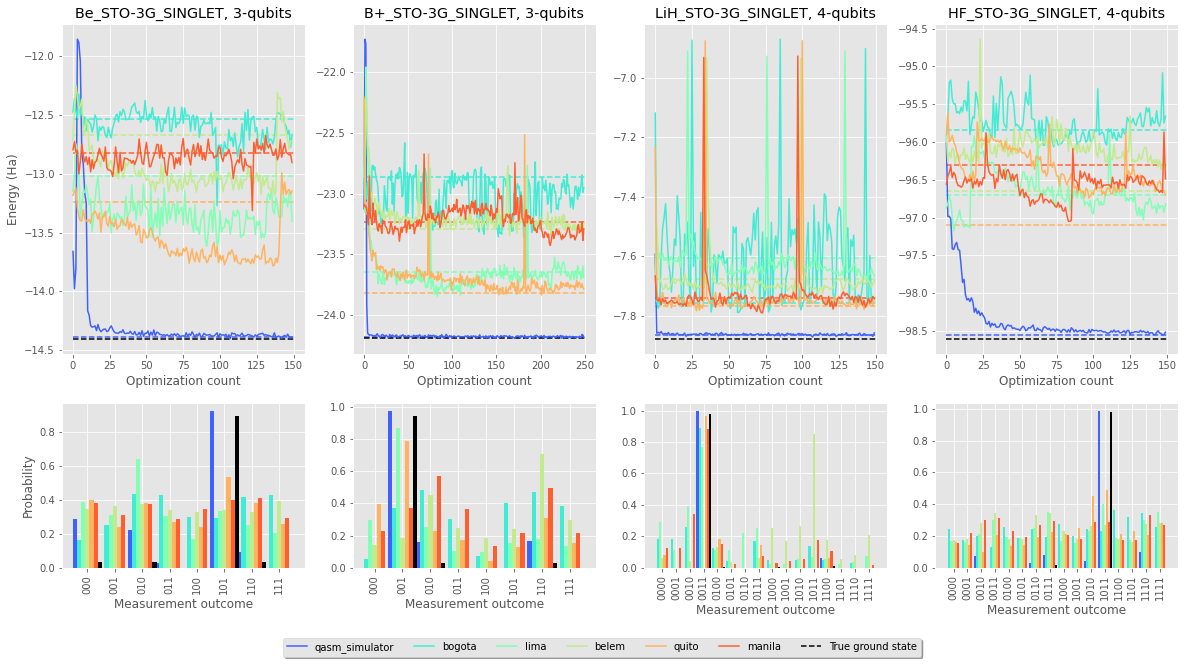

In [16]:
import utils.bit_tools as bit

fig,axs=plt.subplots(nrows=2,
                     ncols=len(speciesnames), 
                     figsize=(5*len(speciesnames),10),
                     gridspec_kw={'height_ratios': [2, 1]})

width = 0.15

for grid_y, speciesname in enumerate(speciesnames):
    true_gs = meta_data[speciesname]['true_gs']
    num_sim_q = meta_data[speciesname]['num_sim_q']
    
    bit_strings = [bit.int_to_bin(i, num_sim_q) for i in range(2**num_sim_q)]
    bit_map = {b:index for index, b in enumerate(bit_strings)}
    plot_backends = [b for b in backends if b not in ['ibmq_santiago', 'statevector_simulator']]
    num_backends = len(plot_backends)
    for index, backend in enumerate(plot_backends):
        c = colour_map[backend]
        data = cs_vqe_data[speciesname][backend]
        loss=data["optimizer_history"]["loss"]
        X, Y = list(zip(*list(data['eigenstate'].items())))
        l2 = axs[(0, grid_y)].hlines(data['optimal_value'],0,len(loss), ls='--', color=c)
        name = backend[5:]
        #else:
        #    loss=data["energy"]
        #    Y = data["outdist"]
        #    X = [bit.int_to_bin(i, num_sim_q) for i in list(range(2**num_sim_q))]
        #    name = 'statevector_simulator'
        l1 = axs[(0, grid_y)].plot(loss, label=name, color=c)
        X_indices = np.array([bit_map[x] for x in X])
        axs[(1, grid_y)].bar(X_indices+index*width, Y, width=width, color=c)

    Y = [abs(e)**2 for e in meta_data[speciesname]['gsvector']]
    X = [bit.int_to_bin(i, num_sim_q) for i in list(range(2**num_sim_q))]
    X_indices = np.array([bit_map[x] for x in X])
    axs[(1, grid_y)].bar(X_indices+num_backends*width, Y, width=width, color='black')
    l2 = axs[(0, grid_y)].hlines(true_gs,0,len(loss), label='True ground state', ls='--', color='black')
    
    axs[(0, grid_y)].set_xlabel('Optimization count')
    axs[(0, grid_y)].set_title('%s, %i-qubits'%(speciesname, num_sim_q))
    axs[(1, grid_y)].set_xticks(np.arange(2**num_sim_q)+width*(num_backends)/2)
    axs[(1, grid_y)].set_xticklabels(bit_strings, rotation=90)
    axs[(1, grid_y)].set_xlabel('Measurement outcome')

axs[(0, 0)].set_ylabel('Energy (Ha)')
axs[(1, 0)].set_ylabel('Probability')
handles, labels = axs[(0,0)].get_legend_handles_labels()
fig.legend(handles=handles,
           labels=labels,
           loc='lower center',
           borderaxespad=0.1,
           fancybox=True, 
           shadow=True,
           ncol=len(cs_vqe_data['B+_STO-3G_SINGLET'])+1,
           bbox_to_anchor=(0.5, -0.0))

In [44]:
fig.savefig('plots/CS-VQE_paper/IBMQ-runtime_plots.png', dpi=300, bbox_inches='tight')

In [46]:
file_order={'info':0, 'result':1}
cs_vqe_data={}
speciesname="C_STO-3G_SINGLET"
data_path = "data/IBMQ-runtime/"+speciesname
cs_vqe_data[speciesname] = {}
for job in os.listdir(data_path):
    if job not in ["old", "statevectorsim.json"]:
        files = [(file_order[f[f.find('-')+1:f.find('.json')]], f) for f in os.listdir(data_path+'/'+job)]
        files = sorted(files, key=lambda x:x[0])
        for data_type, file in files:
            with open('{}/{}/{}'.format(data_path, job, file), 'r') as json_file:
                vqe_results = json.load(json_file)
            if data_type == 0:
                backend = vqe_results['backend']
            else:
                cs_vqe_data[speciesname][backend] = vqe_results
    else:
        with open('{}/statevectorsim.json'.format(data_path), 'r') as json_file:
            vqe_results = json.load(json_file)
        cs_vqe_data[speciesname]['statevector_simulator'] = vqe_results

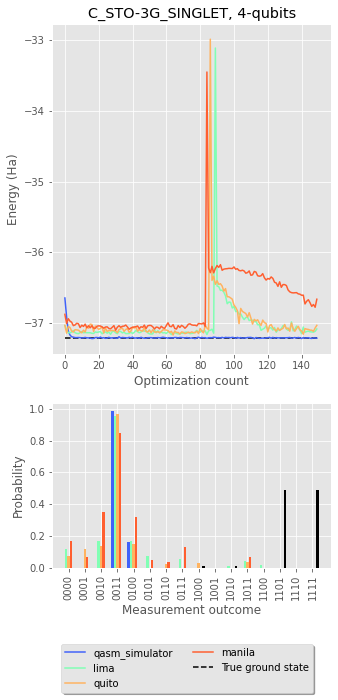

In [48]:
import utils.bit_tools as bit

fig,axs=plt.subplots(nrows=2,
                     ncols=1, 
                     figsize=(5,10),
                     gridspec_kw={'height_ratios': [2, 1]})

width = 0.15

true_gs = meta_data[speciesname]['true_gs']
num_sim_q = meta_data[speciesname]['num_sim_q']

bit_strings = [bit.int_to_bin(i, num_sim_q) for i in range(2**num_sim_q)]
bit_map = {b:index for index, b in enumerate(bit_strings)}
plot_backends = [b for b in backends if b not in ['ibmq_belem', 'ibmq_bogota', 'ibmq_santiago', 'statevector_simulator']]
num_backends = len(plot_backends)
for index, backend in enumerate(plot_backends):
    c = colour_map[backend]
    data = cs_vqe_data[speciesname][backend]
    name = backend[5:]
    loss=data["optimizer_history"]["loss"]
    l1 = axs[0].plot(loss, label=name, color=c)
    #l2 = axs[0].hlines(data['optimal_value'],0,len(loss), ls='--', color=c)
    
    X, Y = list(zip(*list(data['eigenstate'].items())))
    X_indices = np.array([bit_map[x] for x in X])
    axs[1].bar(X_indices+index*width, Y, width=width, color=c)

Y = [abs(e)**2 for e in meta_data[speciesname]['gsvector']]
X = [bit.int_to_bin(i, num_sim_q) for i in list(range(2**num_sim_q))]
X_indices = np.array([bit_map[x] for x in X])
axs[1].bar(X_indices+num_backends*width, Y, width=width, color='black')
l2 = axs[0].hlines(true_gs,0,len(loss), label='True ground state', ls='--', color='black')

axs[0].set_xlabel('Optimization count')
axs[0].set_title('%s, %i-qubits'%(speciesname, num_sim_q))
axs[1].set_xticks(np.arange(2**num_sim_q)+width*(num_backends)/2)
axs[1].set_xticklabels(bit_strings, rotation=90)
axs[1].set_xlabel('Measurement outcome')
axs[0].set_ylabel('Energy (Ha)')
axs[1].set_ylabel('Probability')
handles, labels = axs[0].get_legend_handles_labels()

fig.legend(handles=handles,
           labels=labels,
           loc='lower center',
           borderaxespad=0.1,
           fancybox=True, 
           shadow=True,
           ncol=len(cs_vqe_data)+1,
           bbox_to_anchor=(0.5, -0.05))